<a href="https://colab.research.google.com/github/swypar/PROJECTS/blob/main/Personal_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).


In [ ]:
#Importing packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
loan = pd.read_csv(io.BytesIO(uploaded['UniversalBank.csv']))


Saving UniversalBank.csv to UniversalBank (1).csv



#Data Preprocessing 


In [ ]:
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#Evaluate missing values

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No null values


In [ ]:
loan.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
loan.columns= [s.strip().replace(' ', '_') for s in loan]

In [ ]:
loan.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#Evaluating the target variable distribution

In [ ]:
loan.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


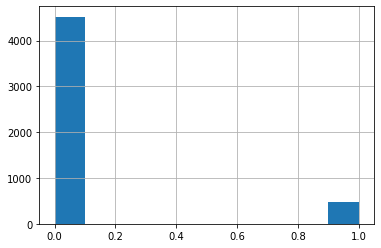

In [ ]:
loan.Personal_Loan.hist()

# Rescaling numerical factors and dummy coding categorical features.

In [ ]:
loan.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'], dtype=object)

In [ ]:
loan_clean = loan.drop(['ID'], axis=1)
X = loan_clean.drop('Personal_Loan', axis=1)
y = loan_clean['Personal_Loan']

In [ ]:
bankd_clean.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X1 = scaler.fit_transform(loan_clean)
X1_rescaled = pd.DataFrame(loan_clean,columns=X.columns)

print(X1_rescaled)

      Age  Experience  Income  ...  CD_Account  Online  CreditCard
0      25           1      49  ...           0       0           0
1      45          19      34  ...           0       0           0
2      39          15      11  ...           0       0           0
3      35           9     100  ...           0       0           0
4      35           8      45  ...           0       0           1
...   ...         ...     ...  ...         ...     ...         ...
4995   29           3      40  ...           0       1           0
4996   30           4      15  ...           0       1           0
4997   63          39      24  ...           0       0           0
4998   65          40      49  ...           0       1           0
4999   28           4      83  ...           0       1           1

[5000 rows x 12 columns]


In [ ]:
X1_rescaled.describe()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
loan_clean.corr()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP_Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [ ]:
loan.corr(['Personal_Loan'].column_values(ascending=False))

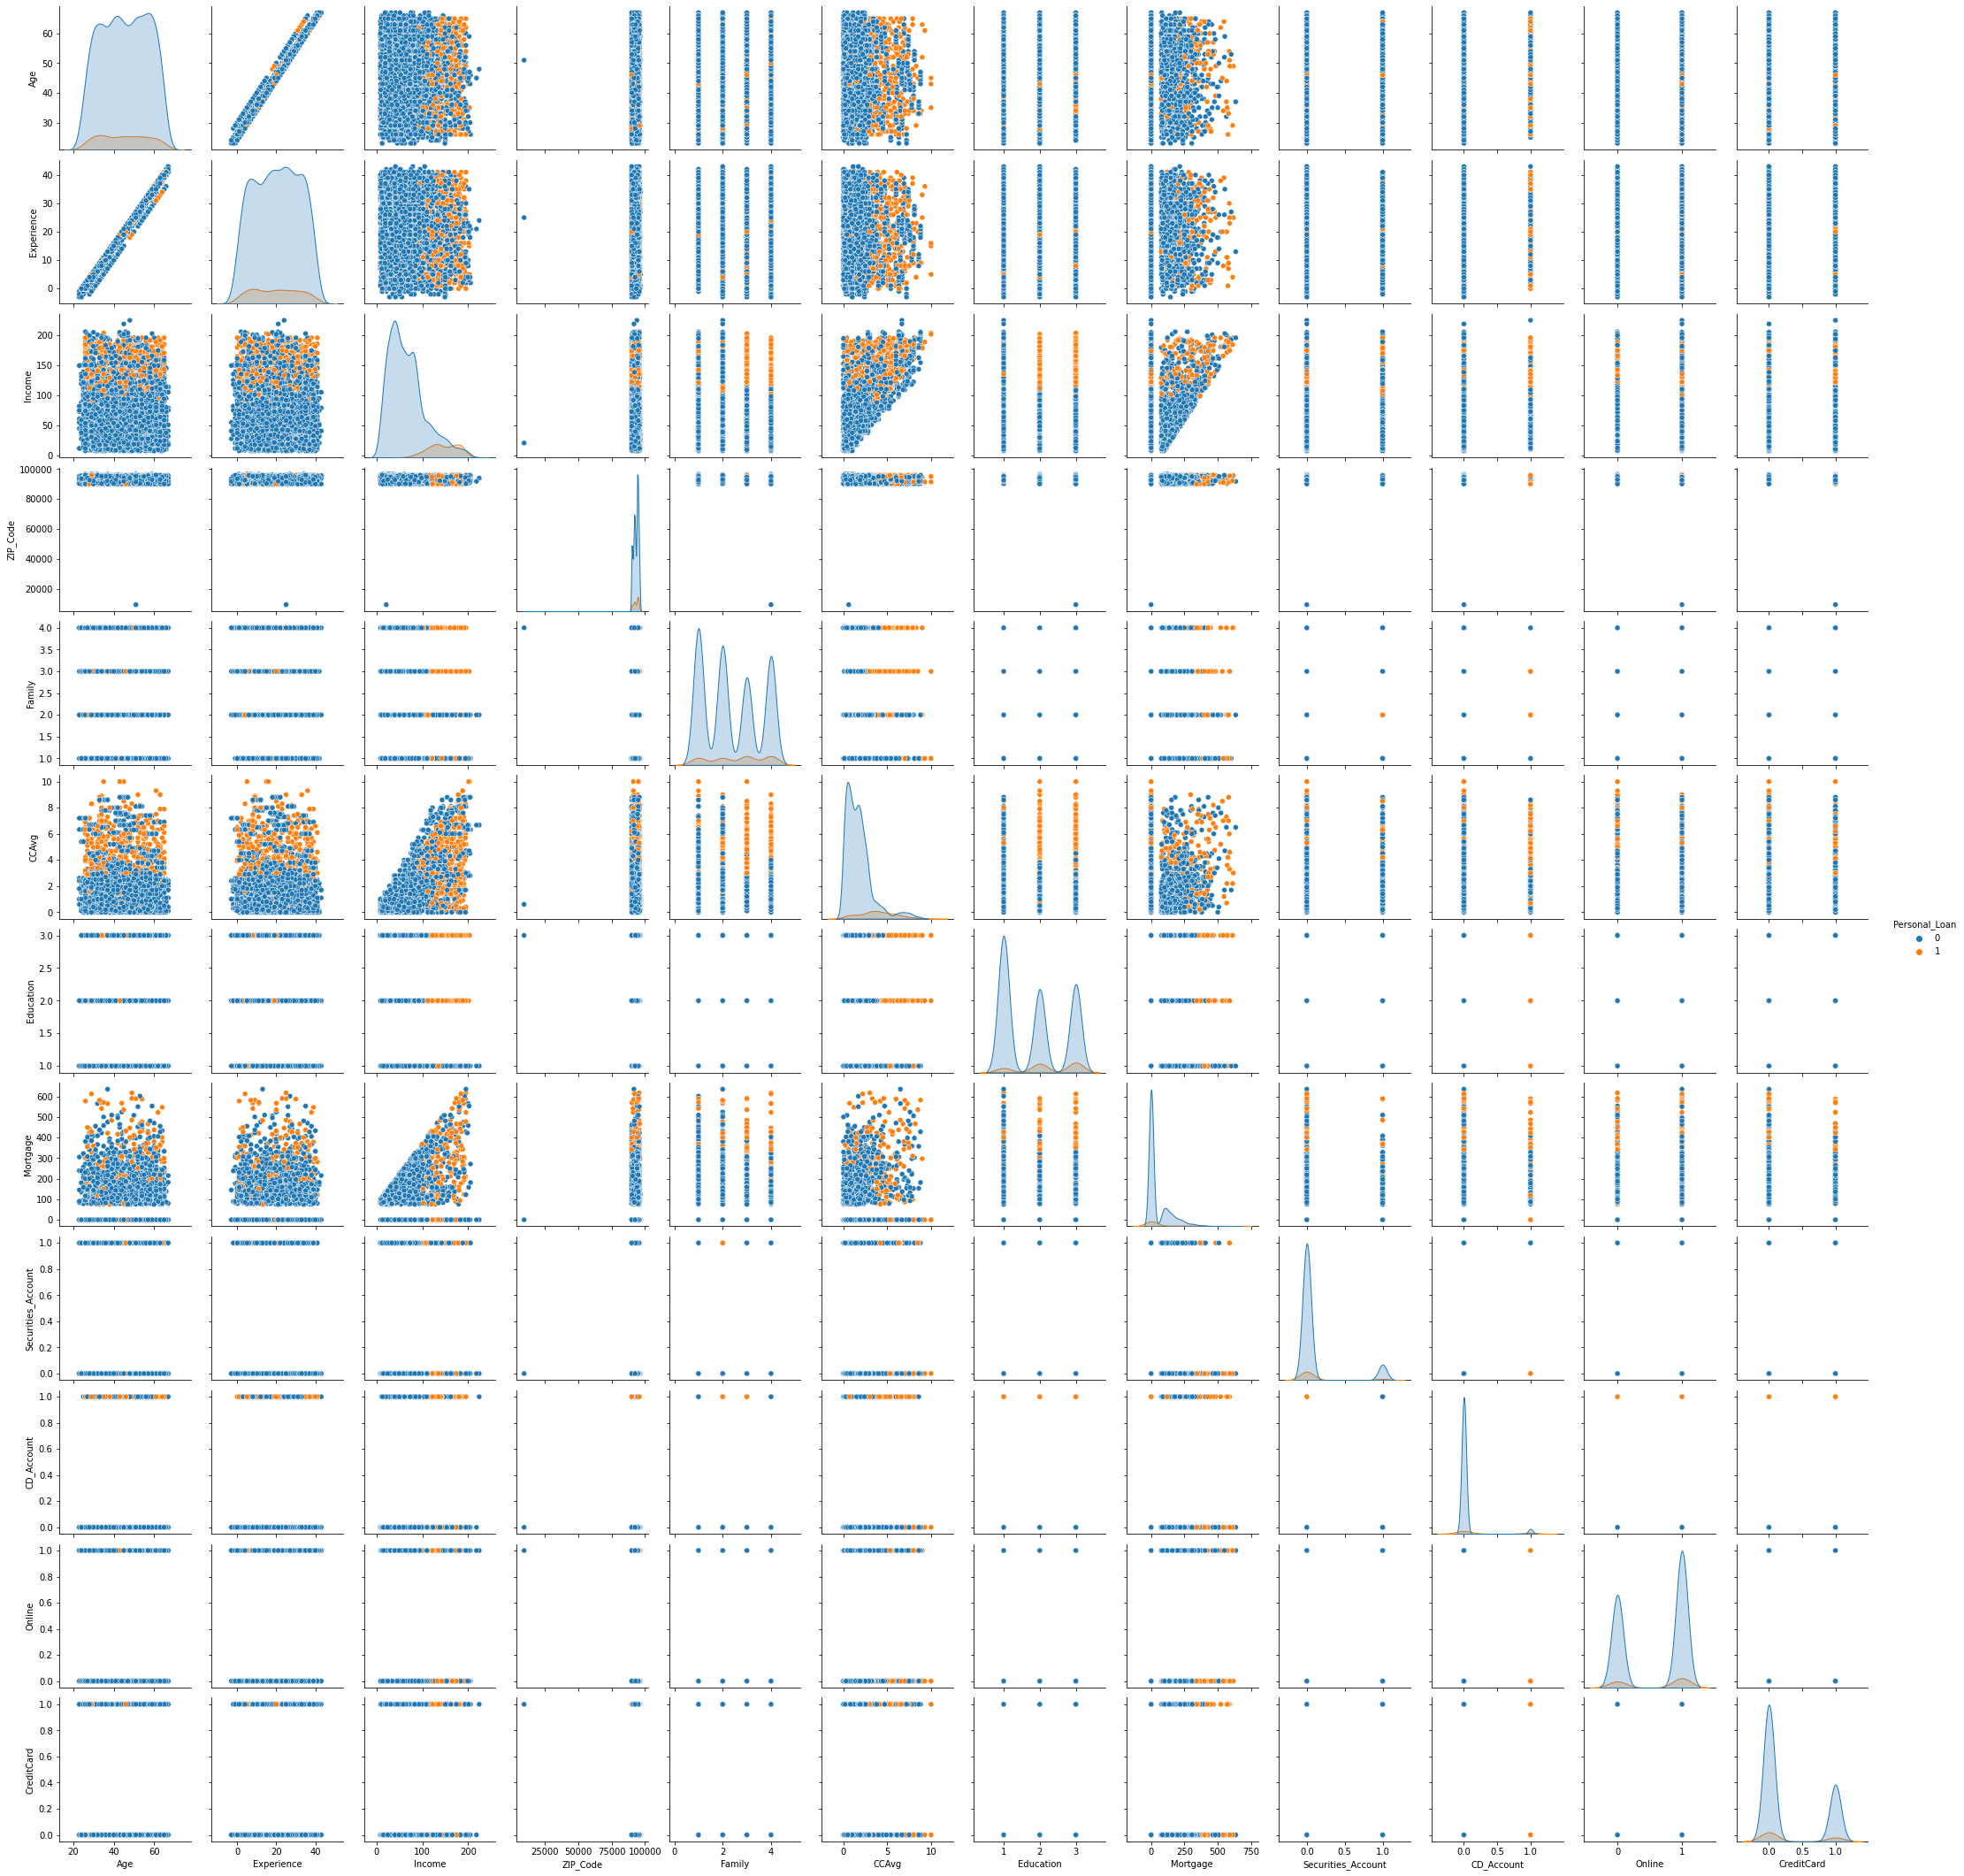

In [ ]:
sns.pairplot(loan_clean, hue='Personal_Loan')

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

#Splitting datasets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1334   17]
 [  78   71]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.81      0.48      0.60       149

    accuracy                           0.94      1500
   macro avg       0.88      0.73      0.78      1500
weighted avg       0.93      0.94      0.93      1500



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


We have 71 is our True positives, 1334 as True Negatives Recall for class 1 is 48, precision for class one is 93, harmonic mean is 60 and the support, which is based on cases is 149

In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred_mlpc))


ROC AUC:  0.7319633977317325


8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

# EffectS of the number of hidden nodes 5 - 30

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='relu', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

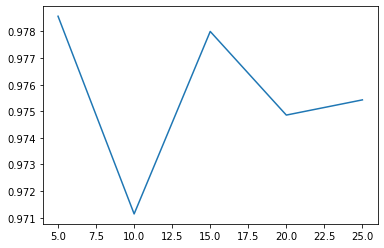

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='relu', solver='adam', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


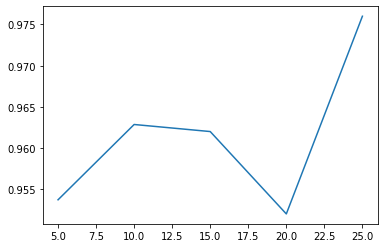

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=30, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1335   16]
 [  68   81]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.54      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred_mlpc))

ROC AUC:  0.7658905409366167


In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=40, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1336   15]
 [  65   84]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.56      0.68       149

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred_mlpc)) 

ROC AUC:  0.7763277512555949


As a results of our confusion matrix predictve performance also improves. 

